In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits import mplot3d
import pickle # convert model into bytestream

pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv('D:\This Project\Credit Spend\CreditCards.csv')

In [3]:
''' 
given ->> amount of transaction at one go for a person 

Aim ->  to predict transaction for a person in particular month , gender , card type 

    -> cluster customers based on card type , amount and gender and give reminder of saving and amount to
 save to customers spending more frequently 

 
NEW AIMS - Include YOur Knowledge about Quants( how Credits , Equities work in market ) 
      -  Also uae a RNN to analyze transctino amnt of indiviudla users and do future prediction basedon prev transaction (RNN)
'''

' \ngiven ->> amount of transaction at one go for a person \n\nAim ->  to predict transaction for a person in particular month , gender , card type \n\n    -> cluster customers based on card type , amount and gender and give reminder of saving and amount to\n save to customers spending more frequently \n\n \nNEW AIMS - Include YOur Knowledge about Quants( how Credits , Equities work in market ) \n      -  Also uae a RNN to analyze transctino amnt of indiviudla users and do future prediction basedon prev transaction (RNN)\n'

In [4]:
data.info()

''' 2 rows are empty '''

data.dropna( inplace = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26054 entries, 0 to 26053
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      26052 non-null  float64
 1   City       26052 non-null  object 
 2   Date       26054 non-null  object 
 3   Card Type  26052 non-null  object 
 4   Exp Type   26052 non-null  object 
 5   Gender     26052 non-null  object 
 6   Amount     26052 non-null  float64
 7   Year       26052 non-null  float64
 8   Month      26052 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.8+ MB


In [5]:
data.describe()

,index,Amount,Year
count,26052.000000,26052.000000,26052.000000
mean,13025.500000,156411.537425,2014.092392
std,7520.708943,103063.254287,0.620761
min,0.000000,1005.000000,2013.000000
25%,6512.750000,77120.250000,2014.000000
50%,13025.500000,153106.500000,2014.000000
75%,19538.250000,228050.000000,2014.000000
max,26051.000000,998077.000000,2015.000000


In [6]:
''' Removing 'India' name from City  and adding a new field of cities '''


def extract_city ( col ) :
    cities = []
    rows = len(col) 
    for i in range(rows ) :

        st = data.loc[i]['City']
        city = st.split(',')[0]
        cities.append(city )
    
    return cities 

cities = extract_city( data['City'])

data.drop( 'City' , axis=1 , inplace= True )

In [7]:
'''  Adding this new field of only cities ''' 

data['Cities'] = cities 


In [8]:
''' Dropping the Date & Index Column since Month ( festivities) are already given '''

data = data.drop( ['Date' , 'index' ] , axis = 1 )


In [9]:
data.head()

,Card Type,Exp Type,Gender,Amount,Year,Month,Cities
0,Gold,Bills,F,82475.0,2014.0,October,Delhi
1,Platinum,Bills,F,32555.0,2014.0,August,Greater Mumbai
2,Silver,Bills,F,101738.0,2014.0,August,Bengaluru
3,Signature,Bills,F,123424.0,2014.0,April,Greater Mumbai
4,Gold,Bills,F,171574.0,2015.0,May,Bengaluru


In [10]:
''' Some inferences from teh RAW dataset '''

'''  Average amount of transactions per month '''
avg_trans_month = len( data['Amount']) / 12 
print( f" Per month , there have been , Average {avg_trans_month} transactions " )



 Per month , there have been , Average 2171.0 transactions 


In [11]:
data.head()

,Card Type,Exp Type,Gender,Amount,Year,Month,Cities
0,Gold,Bills,F,82475.0,2014.0,October,Delhi
1,Platinum,Bills,F,32555.0,2014.0,August,Greater Mumbai
2,Silver,Bills,F,101738.0,2014.0,August,Bengaluru
3,Signature,Bills,F,123424.0,2014.0,April,Greater Mumbai
4,Gold,Bills,F,171574.0,2015.0,May,Bengaluru


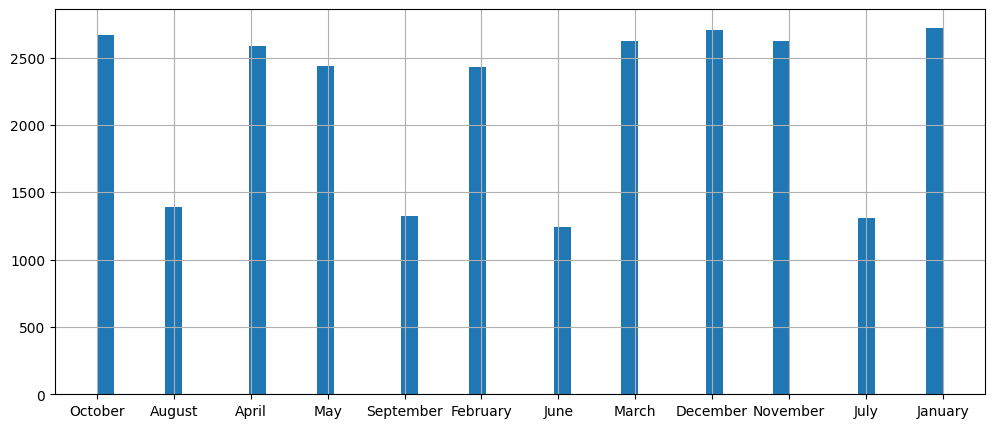

In [12]:
'''  Seeinf Expense made  MOnth-Wise '''

data['Month'].hist(bins  =50 ,  figsize  = (12 , 5))
plt.show()

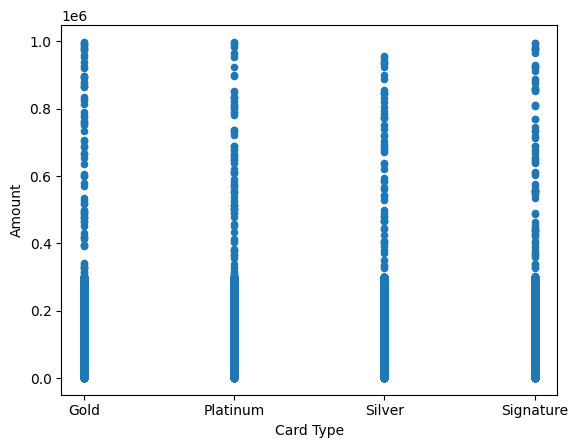

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

In [13]:
data.plot( kind  = 'scatter' , x = 'Card Type' , y = 'Amount')

plt.show()

data['Card Type'].value_counts()

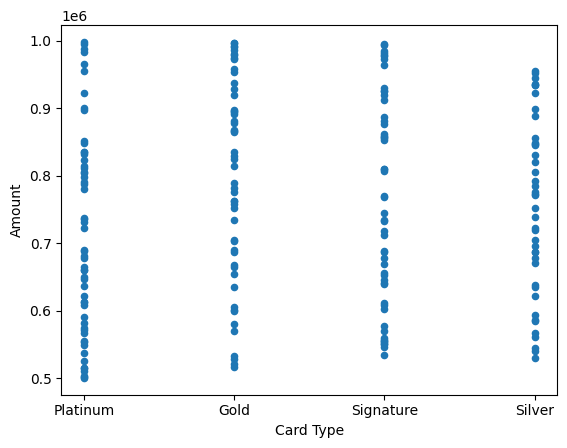

' HIhest Amount of Transactions have been made from the Platinum Card > Gold Card \nInference -> Seems Platinum Card is More Powerful .\n'

In [14]:
''' More than 5.0 lakh ruppes transaction from the Card Type '''

df2 = data[  data['Amount'] >= 500000]

df2.plot( kind  = 'scatter' , x = 'Card Type' , y = 'Amount')

plt.show()

df2['Card Type'].value_counts()

''' HIhest Amount of Transactions have been made from the Platinum Card > Gold Card 
Inference -> Seems Platinum Card is More Powerful .
'''


' Inference  -  1 LAkh to 3 Lakhs transactions are highest '

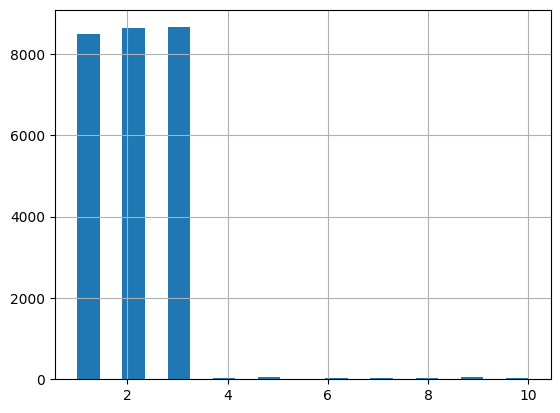

In [15]:
''' Categorise the Amount of Transaction and see Which range amount has been drawn more '''
data1 = data.copy()
data1['Amount'] = pd.cut( data1['Amount'] , bins = [ 0 , 100000 ,  200000 ,  300000 ,  400000 ,  500000 ,  600000 ,  700000 ,  800000 ,  900000 , np.inf] ,
                          labels = [1,2,3,4,5,6,7,8,9,10])
data1['Amount'].hist( bins = 20 )

''' Inference  -  1 LAkh to 3 Lakhs transactions are highest '''

In [16]:
''' Dummy data '''
dummy = data.copy() 


In [17]:
'''  Standarizing the amount Data ( making variance  = 1) and seeing its dsitrbution )( Amount  -> Continuous Random Variable )'''

from sklearn.preprocessing import StandardScaler 

std_scale = StandardScaler()

dummy['Amount']  = std_scale.fit_transform( dummy[['Amount']])



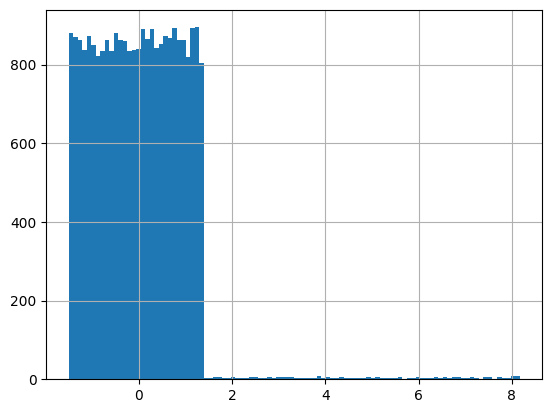

' pdf is higly skewed ( right / positive skewed ) Since people exxpending high Amount of money is usually less in a normal society \nmost are middle class ( mean > median) , so use median to represent data since its least affected by outliers or spread of data  '

In [18]:
''' Visualizing the pdf of Scaled Amount  '''

dummy['Amount'].hist ( bins  = 100 )
plt.show()

''' pdf is higly skewed ( right / positive skewed ) Since people exxpending high Amount of money is usually less in a normal society 
most are middle class ( mean > median) , so use median to represent data since its least affected by outliers or spread of data  '''

In [19]:
dummy1 = data.copy()

In [20]:
'''  Normalizing the amount Data ( making variance  = 1) and seeing its dsitrbution )( Amount  -> Continuous Random Variable )'''

from sklearn.preprocessing import MinMaxScaler  

nor_scale = MinMaxScaler ()



dummy1['Amount']  = nor_scale.fit_transform( dummy1[['Amount']])

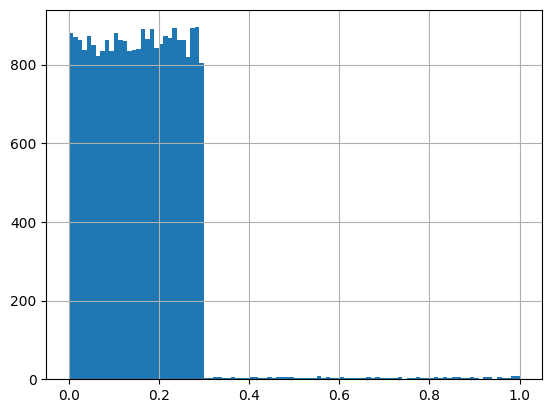

' Inference  '

In [21]:
''' Visualizing the pdf of Scaled Amount  '''

dummy1['Amount'].hist ( bins  = 100 )
plt.show()

''' Inference  '''

In [22]:
dummy1.head()

,Card Type,Exp Type,Gender,Amount,Year,Month,Cities
0,Gold,Bills,F,0.081709,2014.0,October,Delhi
1,Platinum,Bills,F,0.031643,2014.0,August,Greater Mumbai
2,Silver,Bills,F,0.101029,2014.0,August,Bengaluru
3,Signature,Bills,F,0.122778,2014.0,April,Greater Mumbai
4,Gold,Bills,F,0.171070,2015.0,May,Bengaluru


In [23]:
'''  Use Ordinal Encoder to encode Months , since they have rwaaltion b/w them  '''
from sklearn.preprocessing import OrdinalEncoder


def ordinal_encode( col , data , newColName   ) : 
    ord_encode = OrdinalEncoder()
    newCol = ord_encode.fit_transform( data[[ col ]])
    newCols   = pd.DataFrame ( newCol, columns  = [ newColName] )
    data  = pd.concat( [data , newCols ] , axis =1 )
    data = data.drop( col  , axis = 1 )
    return data 

data  = ordinal_encode( 'Month' , data , 'Months' )
data = ordinal_encode('Gender' , data , 'Genders')

data = ordinal_encode( 'Exp Type' , data  , 'Exp Type')

In [24]:
'''Doing Onr-Hot-encoding on the cattegorical data ( Card , Gender  )'''

from sklearn.preprocessing import OneHotEncoder 


def one_hot_encode ( col , data ) :
    encoder = OneHotEncoder( sparse = False )
    df1 = encoder.fit_transform( data[[ col ]] )
    encoded_df = pd.DataFrame ( df1 , columns  = encoder.categories_)
    data = pd.concat( [ encoded_df , data ] , axis =1 )
    data.drop( [ col ] , axis =1 , inplace = True )
    return data 


data = one_hot_encode( 'Card Type' , data )
data  = one_hot_encode( 'Cities' , data )



C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


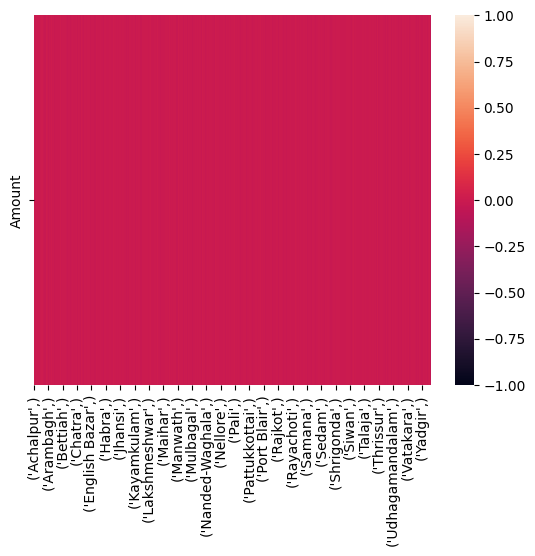

(Achalpur,)     0.003987
(Adilabad,)     0.003904
(Adityapur,)    0.000626
(Adoni,)        0.003360
(Adoor,)       -0.010161
                  ...   
(Silver,)      -0.000204
Amount          1.000000
Year            0.009809
Months         -0.007141
Genders        -0.048928
Name: Amount, Length: 994, dtype: float64


In [25]:
''' To find the Most important feature , we use Correlation Matrix 
and find correaltion of Amount( target var) wrt each column 
'''

corr = data.corr()

sns.heatmap( corr[['Amount']].transpose()  , vmin = -1 , vmax =1 )

plt.show()

print( corr['Amount'])

In [26]:
'''  Train Test split on the dataset and make sure the test dataset has NO sampling bias ( use Stratified Sampling Technique )
     Target Variable -  Amount 

     and Based on Correaltion matrix , most important features are  -  BIlls and Gender 
     But by intutuin , I think Months , BIlls and Gender are good features to ccorealte column of Amount with 
     hence , 
     Most Important Feature I selected -  Months ( earlier I selected Gender bby intution)

     But by Using feature importance of Random Forest and intutuion selected Months 

     Now , we split the data based on 'Months ' and this column is almost balanced 

'''

''' No nned to categorise since Gender is ALREADY a catgorical column '''
'''   Just split the data based on data variation in 'Months' Column  ( hence , NO SAMPLING BIAS )'''

from sklearn.model_selection import StratifiedShuffleSplit  # returs the train and test index based on actual variations 

''' splis =1 ( since ONLY train and  test data )' and generate same train and test indexes everytime ( random_state  = 42 )
and use .loc to pick those returned indices 
'''


a = StratifiedShuffleSplit ( n_splits =1  , test_size = 0.2 , random_state= 42 )

for train_index , test_index  in a.split( data , data['Months']) :
    strat_train_set = data.loc[ train_index ] 
    strat_test_set = data.loc[ test_index]
    


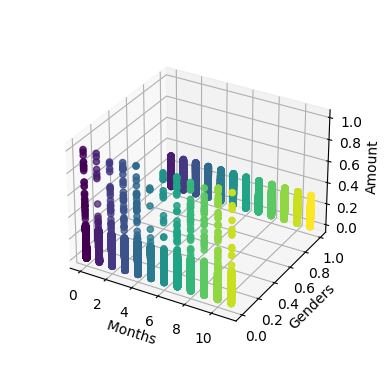

In [27]:
''' Set axes system to 3D '''
ax= plt.axes( projection = '3d')

''' Specify the quantiy on X , Y , Z axes '''

x = data['Months'] 
y = data['Genders']
z = data['Amount']

''' c =x + y changes color theme . Why ?  '''
ax.scatter( x , y , z , c =x + y  )

ax.set_xlabel('Months ')
ax.set_ylabel('Genders')
ax.set_zlabel('Amount')

''' Zoomed out to see Z label '''
ax.set_box_aspect(aspect=None, zoom=0.8)

''' Gender 0 : Female    AND 1: MAle -> Females spent a lot more Money '''

plt.show()

'  Large Number of outliers in Transaction amount but less than novelties ( normal data )\n\n   But removing them is NOT a good choice here as they might indicate abnormal transactions ( might also help in fraud detection parallely)\n   or some transaction for unique part of population \n   \n'

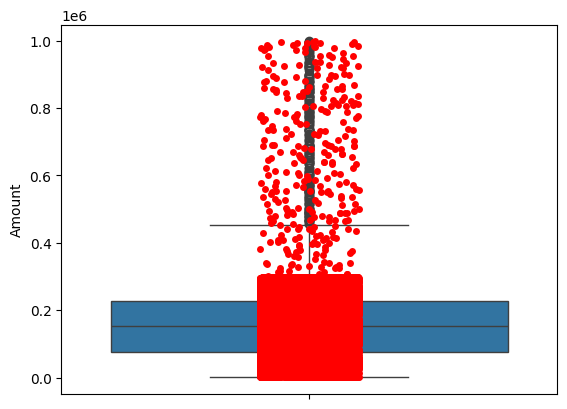

In [28]:
''' FInding if there are outliers in the Amount column '''

sns.boxplot( data['Amount'])
sns.stripplot( data['Amount'] , color  = "red" )

'''  Large Number of outliers in Transaction amount but less than novelties ( normal data )

   But removing them is NOT a good choice here as they might indicate abnormal transactions ( might also help in fraud detection parallely)
   or some transaction for unique part of population 
   
'''



In [29]:
# ist Quantile 
q1 = data['Amount'].quantile( 0.25 )
#3  quantile 
q3 = data['Amount'].quantile( 0.75 )

iqr = q3 - q1  

low_lim = q1 - 1.75* iqr 
upp_lim = q3 + 1.75*iqr 

low_lim , upp_lim

''' Removing Outliers in data   ( OPTIONAL - more experimentation ) '''

data = data [ data['Amount'] <= upp_lim]

In [30]:
''' The Amount column has large varations in the data '''

' The Amount column has large varations in the data '

In [31]:
data.head()

,"(Achalpur,)","(Adilabad,)","(Adityapur,)","(Adoni,)","(Adoor,)","(Afzalpur,)","(Agartala,)","(Agra,)","(Ahmedabad,)","(Ahmednagar,)",...,"(Zirakpur,)","(Zunheboto,)","(Gold,)","(Platinum,)","(Signature,)","(Silver,)",Amount,Year,Months,Genders
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,82475.0,2014.0,10.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,32555.0,2014.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,101738.0,2014.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,123424.0,2014.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,171574.0,2015.0,8.0,0.0


In [32]:
''' Features and labels Sepration '''


X_train , y_train = strat_train_set.drop( ['Amount'] , axis =1 ) , strat_train_set['Amount']

X_test , y_test= strat_test_set.drop( ['Amount'] , axis =1 ) , strat_test_set['Amount']

In [33]:
''' COnverting all column NAMES to string '''

X_train.columns  = X_train.columns.astype(str)

X_test.columns  = X_test.columns.astype(str)


In [34]:
'''  Now making some assumptions about the data and choosing the ML model '''

from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor( n_estimators = 100 )

forest_reg.fit( X_train , y_train )

''' bootstrap = False , the whole data is sued to build Decison tree '''

' bootstrap = False , the whole data is sued to build Decison tree '

In [35]:
''' Seeing the most important features '''
imp = forest_reg.feature_importances_
col = X_train.columns

for i in range(13 ) :
    print(col[i] , " " , imp[i])

''' Most IMportant feature is  - Months '''


('Achalpur',)   0.0002370971329086248
('Adilabad',)   0.0006500115710614946
('Adityapur',)   0.0005167011043482138
('Adoni',)   0.0006838800029575111
('Adoor',)   0.0007332448866456447
('Afzalpur',)   0.0007583789955094808
('Agartala',)   0.0008031607912615397
('Agra',)   4.213342092119687e-05
('Ahmedabad',)   0.010492921120291005
('Ahmednagar',)   0.00017373884318316348
('Aizawl',)   0.0002657121510800169
('Ajmer',)   0.000601514203157652
('Akola',)   0.001205284399045557


' Most IMportant feature is  - Months '

In [36]:
''' Find training error '''

y_pred_train = forest_reg.predict( X_train )

from sklearn.metrics import mean_squared_error

error = mean_squared_error( y_train , y_pred_train )
error = np.sqrt( error )

print( f" the RMSE training error is {error }")

 the RMSE training error is 90944.94536076297


In [37]:
''' Find ANother form of trainig error , cross validation score '''
from sklearn.model_selection import cross_val_score

score = cross_val_score( forest_reg , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

print(score)

print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
''' nearer to 0 ( negative MSE ) is good '''


[-1.20275311e+10 -1.24354363e+10 -1.23053575e+10 -1.10841009e+10
 -1.09318110e+10]
 The average of these Negative mean squared error in cross validation is -11756847357.874647


' nearer to 0 ( negative MSE ) is good '

In [38]:
''' Doing prediction on Test Data '''

y_pred_test = forest_reg.predict( X_test)


In [39]:
''' Testing error '''

test_error = mean_squared_error( y_test , y_pred_test )

print(f" THe testing error(MSE) for Random Forest Regressor model(before fine tuning) is = {test_error} ")

''' Inference , testing error too high ( Very Wrong Predictions )'''

 THe testing error(MSE) for Random Forest Regressor model(before fine tuning) is = 11754523108.785675 


' Inference , testing error too high ( Very Wrong Predictions )'

In [40]:
from sklearn.metrics import r2_score

print( r2_score ( y_test , y_pred_test ))

'''  From R2 Score , we infer - Polynomial Regression  Model performing better '''

-0.07985455436929234


'  From R2 Score , we infer - Polynomial Regression  Model performing better '

In [41]:
# ''' Fine tune the Model '''

# ''' THe ONly hyper param I am concerned about  - No of decision trees in Random Forest , SO use Grid Search > Randomized Sarch '''

# from sklearn.model_selection import GridSearchCV 

# params = [ { "n_estimators" : [ 500 , 1000 ]} , { "n_estimators" : [ 100 , 200 , 300 ]  , "bootstrap " : [False]} ] 

# grid_search = GridSearchCV( forest_reg , params , cv = 5 )

# grid_search.fit( X_train , y_train)

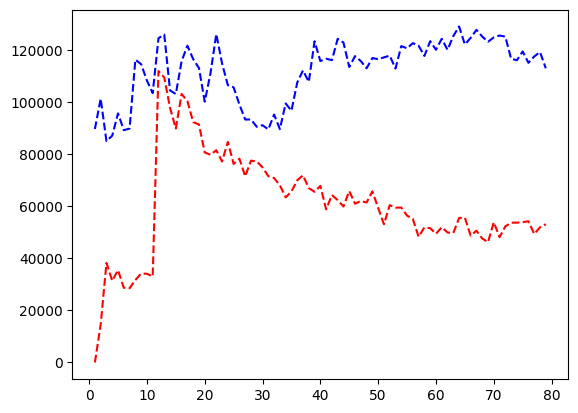

' After removing outliers , high improvement ( but model is highly overfitting now )'

In [42]:
'''  Drawing the Learnign Curve of Model - showing Training error and Validation error as a function of increasing dataset size '''

from sklearn.model_selection import train_test_split

X_t ,X_val , y_t, y_val = train_test_split( X_train[:100] , y_train[:100] , test_size=0.2 )


train_error =[]
val_error = []

for i in range(1 ,  len(X_t)) :
    X1 = X_t[:i]
    y1 = y_t[:i]
    forest_reg.fit(X1 , y1 )
    y_t_pred = forest_reg.predict(X1)

    y_val_pred = forest_reg.predict(X_val)
    
    # validation set issame but as the model learns more , the validation score changes 
    train_error.append( np.sqrt(mean_squared_error(y1 , y_t_pred)) )
    val_error.append( np.sqrt(mean_squared_error(y_val , y_val_pred)))

plt.plot ( range(1 , len(X_t)) , train_error , "r--" , label = "Training_error ")
plt.plot( range( 1 , len(X_t)) , val_error , "b--" , label = "Validation_error")
plt.show()

''' Model is highly underfitting , so MAybe , MAny outliers in data  '''
''' After removing outliers , high improvement ( but model is highly overfitting now )'''


In [43]:
''' Trying Polynomial Regression Model '''

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures( degree = 1  )
X_pow = poly_reg.fit_transform( X_train  )

In [44]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit ( X_pow, y_train)


LinearRegression()

In [45]:
# ''' Find ANother form of trainig error , cross validation score '''
# from sklearn.model_selection import cross_val_score

# score = cross_val_score( lin_reg , X_pow , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

# print(score)

# print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
# ''' nearer to 0 ( negative MSE ) is good '''


In [46]:

X_test_pow = poly_reg.transform(X_test)

y_test_pow = lin_reg.predict( X_test_pow  )

In [47]:
''' Testing error '''

test_error = mean_squared_error( y_test , y_test_pow  )

print(f" THe testing error(MSE) for Polynomial Regressort Regressor model(before fine tuning) is = {test_error} ")

''' Inference , testing error too high ( Very Wrong Predictions )'''

 THe testing error(MSE) for Polynomial Regressort Regressor model(before fine tuning) is = 1.1021792111762108e+29 


' Inference , testing error too high ( Very Wrong Predictions )'

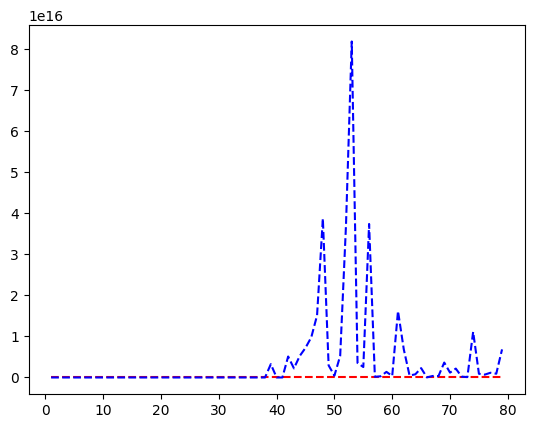

' Highly Overfitting - Without removing the dataset '

In [48]:
'''  Drawing the Learnign Curve of Model - showing Training error and Validation error as a function of increasing dataset size '''



X_t ,X_val , y_t, y_val = train_test_split( X_train[:100] , y_train[:100] , test_size=0.2 )


train_error =[]
val_error = []

for i in range(1 ,  len(X_t)) :
    X1 = X_t[:i]
    y1 = y_t[:i]
    lin_reg.fit(X1 , y1 )
    y_t_pred = lin_reg.predict(X1)

    y_val_pred = lin_reg.predict(X_val)
    
    # validation set issame but as the model learns more , the validation score changes 
    train_error.append( np.sqrt(mean_squared_error(y1 , y_t_pred)) )
    val_error.append( np.sqrt(mean_squared_error(y_val , y_val_pred)))

plt.plot ( range(1 , len(X_t)) , train_error , "r--" , label = "Training_error ")
plt.plot( range( 1 , len(X_t)) , val_error , "b--" , label = "Validation_error")
plt.show()

''' Highly Overfitting - Without removing the dataset '''

In [49]:
from sklearn.metrics import r2_score

print( r2_score ( y_test , y_test_pow))

'''  From R2 Score , we infer - Polynomial Regression  Model performing better '''

-1.0125406449115744e+19


'  From R2 Score , we infer - Polynomial Regression  Model performing better '

In [50]:
from sklearn.linear_model import SGDRegressor 

sgd = SGDRegressor( penalty = "elasticnet" , l1_ratio= 0.5 )
sgd.fit( X_train , y_train)


SGDRegressor(l1_ratio=0.5, penalty='elasticnet')

In [51]:
''' Find ANother form of trainig error , cross validation score '''
from sklearn.model_selection import cross_val_score

score = cross_val_score( sgd , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

print(score)

print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
''' nearer to 0 ( negative MSE ) is good '''


[-2.65922843e+28 -8.49147123e+28 -1.78553428e+29 -6.21168848e+29
 -1.32512251e+29]
 The average of these Negative mean squared error in cross validation is -2.0874830464355423e+29


' nearer to 0 ( negative MSE ) is good '

In [52]:
y_pred_sgd = sgd.predict(X_test)

In [53]:
''' Testing error '''

test_error = mean_squared_error( y_test , y_pred_sgd )

print(f" THe testing error(MSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = {test_error} ")

''' Inference , testing error too high ( Very Wrong Predictions )'''

 THe testing error(MSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = 1.8398235575920831e+30 


' Inference , testing error too high ( Very Wrong Predictions )'

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

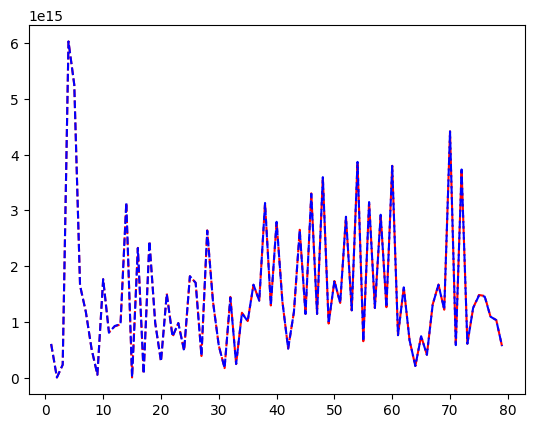

' Highly Overfitting - Without removing the dataset '

In [54]:
'''  Drawing the Learnign Curve of Model - showing Training error and Validation error as a function of increasing dataset size '''



X_t ,X_val , y_t, y_val = train_test_split( X_train[:100] , y_train[:100] , test_size=0.2 )


train_error =[]
val_error = []

for i in range(1 ,  len(X_t)) :
    X1 = X_t[:i]
    y1 = y_t[:i]
    sgd.fit(X1 , y1 )
    y_t_pred = sgd.predict(X1)

    y_val_pred = sgd.predict(X_val)
    
    # validation set issame but as the model learns more , the validation score changes 
    train_error.append( np.sqrt(mean_squared_error(y1 , y_t_pred)) )
    val_error.append( np.sqrt(mean_squared_error(y_val , y_val_pred)))

plt.plot ( range(1 , len(X_t)) , train_error , "r--" , label = "Training_error ")
plt.plot( range( 1 , len(X_t)) , val_error , "b--" , label = "Validation_error")
plt.show()

''' Highly Overfitting - Without removing the dataset '''

In [55]:
from sklearn.metrics import r2_score

print( r2_score ( y_test , y_pred_sgd))

'''  From R2 Score , we infer - SGD Regression  Model '''

-1.690193493615046e+20


'  From R2 Score , we infer - SGD Regression  Model '

In [56]:
''' SVM REgression '''

from sklearn.svm import LinearSVR ,SVR

Lin_svm = LinearSVR( epsilon=1.5 )
# do wide margin regression 
Lin_svm.fit( X_train , y_train)



C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [57]:
svr = SVR( epsilon=1.5 , kernel="rbf" )
# do wide margin regression 
svr.fit( X_train , y_train)

SVR(epsilon=1.5)

In [58]:
# ''' Linear SVM , ( fitting amargin , wide street Find ANother form of trainig error , cross validation score '''


# score = cross_val_score( Lin_svm , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

# print(score)

# print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
# ''' nearer to 0 ( negative MSE ) is good '''


In [59]:
y_pred_svm = Lin_svm.predict( X_test )


In [60]:
y_pred_svr = svr.predict( X_test )


In [61]:
''' Testing error '''

test_error = mean_squared_error( y_test , y_pred_svm )

print(f" THe testing error(MSE) for LinearSVR  model(before fine tuning) is = {test_error} ")

''' Inference , testing error too high ( Very Wrong Predictions )'''

 THe testing error(MSE) for LinearSVR  model(before fine tuning) is = 10896634790.293653 


' Inference , testing error too high ( Very Wrong Predictions )'

In [62]:
''' Testing error '''

test_error = mean_squared_error( y_test , y_pred_svr )

print(f" THe testing error(MSE) for SVR  model(before fine tuning) is = {test_error} ")

''' Inference , testing error too high ( Very Wrong Predictions )'''

 THe testing error(MSE) for SVR  model(before fine tuning) is = 10886712879.237543 


' Inference , testing error too high ( Very Wrong Predictions )'

In [63]:
score = r2_score( y_test , y_pred_svr)

print( f" R2 score for linear SVM Regressor is {score}")
'''  Alittle Better'''

 R2 score for linear SVM Regressor is -0.00013130060280075462


'  Alittle Better'

In [64]:
score = r2_score( y_test , y_pred_svm)

print( f" R2 score for linear SVM Regressor is {score}")
'''  Alittle Better'''

 R2 score for linear SVM Regressor is -0.0010427983082226255


'  Alittle Better'

In [65]:
''' Pickling the Model and Running the Streamlit function '''

# with open('forest_reg.pkl', 'wb') as file:
#     pickle.dump(forest_reg, file)

# import streamlit as st 
# # !streamlit run test.py 

' Pickling the Model and Running the Streamlit function '